Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
df_train = pd.read_csv(
    "data/assignment_2_train.csv"
)

df_test = pd.read_csv(
    "data/assignment_2_test.csv"
)

print("gf_train.shape = {} rows, {} cols".format(*df_train.shape))
print("df_test.shape = {} rows, {} cols".format(*df_test.shape))
df_train.head(n=2)

gf_train.shape = 180000 rows, 394 cols
df_test.shape = 100001 rows, 394 cols


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_train['isFraud'].unique()

array([0, 1], dtype=int64)

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(df_train, test_size=0.33,  random_state=42)

In [5]:
y_train = df_train['isFraud']
y_valid = df_valid['isFraud']
y_test = df_test['isFraud']

df_train = df_train.drop(["isFraud", "TransactionID"], axis=1)
df_valid = df_valid.drop(["isFraud", "TransactionID"], axis=1)
df_test = df_test.drop(["isFraud", "TransactionID"], axis=1)

print("df_train.shape = {} rows, {} cols".format(*df_train.shape))
print("df_train.shape = {} rows, {} cols".format(*df_valid.shape))
print("df_test.shape = {} rows, {} cols".format(*df_test.shape))

df_train.shape = 120600 rows, 392 cols
df_train.shape = 59400 rows, 392 cols
df_test.shape = 100001 rows, 392 cols


In [6]:
num_df_train = df_train.select_dtypes(include=[np.number])
num_df_valid = df_valid.select_dtypes(include=[np.number])
num_df_test = df_test.select_dtypes(include=[np.number])
print(f"count of num_df_train {num_df_train.shape[1]}")
print(f"count of num_df_valid {num_df_valid.shape[1]}")
print(f"count of num_df_test {num_df_test.shape[1]}")

num_df_train.columns

count of num_df_train 378
count of num_df_valid 378
count of num_df_test 378


Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
       'addr1', 'addr2', 'dist1', 'dist2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=378)

In [7]:
%%time

dtrain = xgb.DMatrix(data=num_df_train, label=y_train)
print('*')
dvalid = xgb.DMatrix(data=num_df_valid, label=y_valid)
print('*')
dtest_xgb_num = xgb.DMatrix(data=num_df_test)

*
*
Wall time: 3.6 s


In [8]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 1000,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [9]:
model_xgb_num = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=10,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=10,
    maximize=True,
)

[0]	train-auc:0.6537	valid-auc:0.643273
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 10 rounds.
[10]	train-auc:0.661205	valid-auc:0.651251
[20]	train-auc:0.672065	valid-auc:0.664306
[30]	train-auc:0.672456	valid-auc:0.665313
[40]	train-auc:0.674907	valid-auc:0.667972
[50]	train-auc:0.688535	valid-auc:0.679098
[60]	train-auc:0.711416	valid-auc:0.703751
[70]	train-auc:0.716698	valid-auc:0.708327
[80]	train-auc:0.753067	valid-auc:0.744564
[90]	train-auc:0.795598	valid-auc:0.784656
[100]	train-auc:0.802075	valid-auc:0.791977
[110]	train-auc:0.809749	valid-auc:0.800842
[120]	train-auc:0.813342	valid-auc:0.805529
[130]	train-auc:0.814448	valid-auc:0.806353
[140]	train-auc:0.817551	valid-auc:0.810039
[150]	train-auc:0.818744	valid-auc:0.811341
[160]	train-auc:0.826132	valid-auc:0.816168
[170]	train-auc:0.826993	valid-auc:0.81849
[180]	train-auc:0.827197	valid-auc:0.819053
[190]	train-auc:0.836609	valid-auc:

Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

In [10]:
сategorical_feature = list(set(df_train.columns) - set(num_df_train.columns))
сategorical_feature

['M3',
 'P_emaildomain',
 'M2',
 'M1',
 'M9',
 'M5',
 'M8',
 'M4',
 'M7',
 'M6',
 'card4',
 'ProductCD',
 'card6',
 'R_emaildomain']

In [11]:
categorical_df_train = df_train.copy()
categorical_df_valid = df_valid.copy()
categorical_df_test = df_test.copy()

for i in range(len(сategorical_feature)):
    print(f'feature {сategorical_feature[i]}')
    сategorical_train = df_train[сategorical_feature[i]].unique()
    сategorical_valid = df_valid[сategorical_feature[i]].unique()
    сategorical_test = df_test[сategorical_feature[i]].unique()
    #print(f'сategorical train {сategorical_train}')
    #print(f'сategorical test {сategorical_test}')
    
    cat_in_feature = list(set(сategorical_train) & set(сategorical_valid) & set(сategorical_test))
    for cat in cat_in_feature:
        dummie_feature_name = f'{сategorical_feature[i]}_{cat}'
        #print(dummie_feature_name)
        
        if str(cat) != 'nan':
            print(f'    dummie feature name: {dummie_feature_name}')
            categorical_df_train[f'{сategorical_feature[i]}_{cat}'] = 0
            categorical_df_train.loc[categorical_df_train.loc[:,сategorical_feature[i]]==cat, 
                                                          [dummie_feature_name]] = 1      
            
            categorical_df_valid[f'{сategorical_feature[i]}_{cat}'] = 0
            categorical_df_valid.loc[categorical_df_valid.loc[:,сategorical_feature[i]]==cat, 
                                                          [dummie_feature_name]] = 1  
            
            categorical_df_test[f'{сategorical_feature[i]}_{cat}'] = 0
            categorical_df_test.loc[categorical_df_test.loc[:,сategorical_feature[i]]==cat, 
                                                          [dummie_feature_name]] = 1 
            
    categorical_df_train.drop([сategorical_feature[i]], axis='columns', inplace=True)
    categorical_df_valid.drop([сategorical_feature[i]], axis='columns', inplace=True)
    categorical_df_test.drop([сategorical_feature[i]], axis='columns', inplace=True)
    
print(f"count of categorical_df_train {categorical_df_train.shape}")
print(f"count of categorical_df_valid {categorical_df_valid.shape}")
print(f"count of categorical_df_test {categorical_df_test.shape}")

feature M3
    dummie feature name: M3_F
    dummie feature name: M3_T
feature P_emaildomain
    dummie feature name: P_emaildomain_gmx.de
    dummie feature name: P_emaildomain_verizon.net
    dummie feature name: P_emaildomain_bellsouth.net
    dummie feature name: P_emaildomain_earthlink.net
    dummie feature name: P_emaildomain_frontiernet.net
    dummie feature name: P_emaildomain_hotmail.co.uk
    dummie feature name: P_emaildomain_ptd.net
    dummie feature name: P_emaildomain_optonline.net
    dummie feature name: P_emaildomain_ymail.com
    dummie feature name: P_emaildomain_netzero.com
    dummie feature name: P_emaildomain_suddenlink.net
    dummie feature name: P_emaildomain_me.com
    dummie feature name: P_emaildomain_sbcglobal.net
    dummie feature name: P_emaildomain_cableone.net
    dummie feature name: P_emaildomain_live.com
    dummie feature name: P_emaildomain_hotmail.es
    dummie feature name: P_emaildomain_hotmail.de
    dummie feature name: P_emaildomain_rock

In [12]:
%%time

dtrain = xgb.DMatrix(data=categorical_df_train, label=y_train)
print('*')
dvalid = xgb.DMatrix(data=categorical_df_valid, label=y_valid)
print('*')
dtest_xgb_num_cat = xgb.DMatrix(data=categorical_df_test)

*
*
Wall time: 4.87 s


In [13]:
model_xgb_num_cat = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=30,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=50,
    maximize=True,
)

[0]	train-auc:0.6537	valid-auc:0.643273
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.688535	valid-auc:0.679098
[100]	train-auc:0.802075	valid-auc:0.791977
[150]	train-auc:0.818745	valid-auc:0.811341
[200]	train-auc:0.837432	valid-auc:0.833475
[250]	train-auc:0.847918	valid-auc:0.839049
[300]	train-auc:0.862926	valid-auc:0.857809
[350]	train-auc:0.86888	valid-auc:0.861457
[400]	train-auc:0.876072	valid-auc:0.86899
[450]	train-auc:0.881406	valid-auc:0.874648
[500]	train-auc:0.88619	valid-auc:0.879092
[550]	train-auc:0.88997	valid-auc:0.882211
[600]	train-auc:0.893174	valid-auc:0.884977
[650]	train-auc:0.895641	valid-auc:0.887449
[700]	train-auc:0.8978	valid-auc:0.889519
[750]	train-auc:0.899729	valid-auc:0.891341
[800]	train-auc:0.901561	valid-auc:0.892951
[850]	train-auc:0.902978	valid-auc:0.894105
[900]	train-auc:0.904508	valid-auc:0.895324
[950]	train-auc:0.905725	valid-a

Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [14]:
import lightgbm as lgb

In [15]:
params = {
    "boosting_type": "goss",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 200,
    "n_jobs": 6,
    "seed": 27
}

In [16]:
dtrain = lgb.Dataset(
    data=num_df_train, label=y_train
)
dvalid = lgb.Dataset(
    data=num_df_valid, label=y_valid
)
dtest_lgb_num = lgb.Dataset(
    data=num_df_test
)

model_lgb_num = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10
)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds
[10]	training's auc: 0.831271	valid_1's auc: 0.824304
[20]	training's auc: 0.841425	valid_1's auc: 0.835935
[30]	training's auc: 0.863609	valid_1's auc: 0.863109
[40]	training's auc: 0.870132	valid_1's auc: 0.866488
[50]	training's auc: 0.87714	valid_1's auc: 0.872999
[60]	training's auc: 0.880541	valid_1's auc: 0.874975
[70]	training's auc: 0.882204	valid_1's auc: 0.875989
[80]	training's auc: 0.883854	valid_1's auc: 0.876577
[90]	training's auc: 0.887741	valid_1's auc: 0.878825
[100]	training's auc: 0.890157	valid_1's auc: 0.880875
[110]	training's auc: 0.894646	valid_1's auc: 0.88426
[120]	training's auc: 0.897828	valid_1's auc: 0.886651
[130]	training's auc: 0.900206	valid_1's auc: 0.888796
[140]	training's auc: 0.903162	valid_1's auc: 0.890792
[150]	training's auc: 0.905591	valid_1's auc: 0.892886
[160]	training's auc: 0.907581	valid_1's auc: 0.894267
[170]	training's auc: 0.909193	valid_1's auc: 0.895747
[180]	training'

Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [17]:
dtrain = lgb.Dataset(
    data=categorical_df_train, label=y_train
)
dvalid = lgb.Dataset(
    data=categorical_df_valid, label=y_valid
)
dtest_lgb_num_cat = lgb.Dataset(
    data=categorical_df_test
)

model_lgb_num_cat = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=20
)

Training until validation scores don't improve for 50 rounds
[20]	training's auc: 0.841067	valid_1's auc: 0.835206
[40]	training's auc: 0.872572	valid_1's auc: 0.86914
[60]	training's auc: 0.881699	valid_1's auc: 0.875393
[80]	training's auc: 0.8929	valid_1's auc: 0.885035
[100]	training's auc: 0.899437	valid_1's auc: 0.888824
[120]	training's auc: 0.903895	valid_1's auc: 0.892774
[140]	training's auc: 0.908997	valid_1's auc: 0.896248
[160]	training's auc: 0.913929	valid_1's auc: 0.899081
[180]	training's auc: 0.917811	valid_1's auc: 0.901983
[200]	training's auc: 0.921101	valid_1's auc: 0.904367
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.921101	valid_1's auc: 0.904367


Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [18]:
сategorical_feature

['M3',
 'P_emaildomain',
 'M2',
 'M1',
 'M9',
 'M5',
 'M8',
 'M4',
 'M7',
 'M6',
 'card4',
 'ProductCD',
 'card6',
 'R_emaildomain']

In [19]:
df_train.columns

Index(['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=392)

In [20]:
catlgd_df_train = df_train.copy()
catlgd_df_valid = df_valid.copy()
catlgd_df_test = df_test.copy()

for c in сategorical_feature:
    catlgd_df_train[c] = catlgd_df_train[c].astype('category')
    catlgd_df_valid[c] = catlgd_df_valid[c].astype('category')
    catlgd_df_test[c] = catlgd_df_test[c].astype('category')


dtrain = lgb.Dataset(
    data=catlgd_df_train, label=y_train, categorical_feature=сategorical_feature
)
dvalid = lgb.Dataset(
    data=catlgd_df_valid, label=y_valid, categorical_feature=сategorical_feature
)
dtest_lgb_num_catlgb = lgb.Dataset(
    data=catlgd_df_test, categorical_feature=сategorical_feature
)

In [21]:
model_lgb_num_catlgb = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    early_stopping_rounds=50,
    verbose_eval=10
)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[10]	training's auc: 0.83198	valid_1's auc: 0.824495
[20]	training's auc: 0.842139	valid_1's auc: 0.836452
[30]	training's auc: 0.865391	valid_1's auc: 0.864547
[40]	training's auc: 0.872945	valid_1's auc: 0.869832
[50]	training's auc: 0.875948	valid_1's auc: 0.872282
[60]	training's auc: 0.882873	valid_1's auc: 0.876502
[70]	training's auc: 0.890074	valid_1's auc: 0.884059
[80]	training's auc: 0.895218	valid_1's auc: 0.886435
[90]	training's auc: 0.898358	valid_1's auc: 0.888672
[100]	training's auc: 0.90189	valid_1's auc: 0.891069
[110]	training's auc: 0.904683	valid_1's auc: 0.892549
[120]	training's auc: 0.907313	valid_1's auc: 0.894609
[130]	training's auc: 0.909824	valid_1's auc: 0.89636
[140]	training's auc: 0.911589	valid_1's auc: 0.897411
[150]	training's auc: 0.91362	valid_1's auc: 0.898984
[160]	training's auc: 0.9157	valid_1's auc: 0.900508
[170]	training's auc: 0.917606	valid_1's auc: 0.901992
[180]	training's au

Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [22]:
import catboost as cb

In [23]:
cb_params = {
    "n_estimators": 800,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 20,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42
}

In [24]:
model_cb_num = cb.CatBoostClassifier(**cb_params)
model_cb_num.fit(num_df_train, 
                 y_train, 
                 eval_set=[(num_df_train, y_train), (num_df_valid, y_valid)],
                 plot=True
                )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.5872166	test1: 0.5753986	best: 0.5753986 (0)	total: 133ms	remaining: 1m 46s
20:	test: 0.8136500	test1: 0.8117357	best: 0.8117357 (20)	total: 2.11s	remaining: 1m 18s
40:	test: 0.8464870	test1: 0.8446012	best: 0.8447975 (39)	total: 3.77s	remaining: 1m 9s
60:	test: 0.8508325	test1: 0.8464405	best: 0.8466083 (59)	total: 5.4s	remaining: 1m 5s
80:	test: 0.8531646	test1: 0.8479299	best: 0.8484575 (74)	total: 8.07s	remaining: 1m 11s
100:	test: 0.8638482	test1: 0.8615636	best: 0.8616546 (99)	total: 10.1s	remaining: 1m 10s
120:	test: 0.8664275	test1: 0.8637741	best: 0.8637807 (119)	total: 11.9s	remaining: 1m 6s
140:	test: 0.8693443	test1: 0.8670651	best: 0.8670651 (140)	total: 13.6s	remaining: 1m 3s
160:	test: 0.8720735	test1: 0.8705081	best: 0.8705081 (160)	total: 15.3s	remaining: 1m
180:	test: 0.8740899	test1: 0.8725876	best: 0.8725876 (180)	total: 17s	remaining: 58.3s
200:	test: 0.8768782	test1: 0.8753949	best: 0.8753949 (200)	total: 18.7s	remaining: 55.8s
220:	test: 0.8786976	test

Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

In [25]:
model_cb_num_cat = cb.CatBoostClassifier(**cb_params)
model_cb_num_cat.fit(categorical_df_train, 
                 y_train, 
                 eval_set=[(categorical_df_train, y_train), (categorical_df_valid, y_valid)],
                 plot=True
                )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.5788069	test1: 0.5701992	best: 0.5701992 (0)	total: 69.7ms	remaining: 55.7s
20:	test: 0.8416369	test1: 0.8409744	best: 0.8409744 (20)	total: 2.16s	remaining: 1m 20s
40:	test: 0.8577653	test1: 0.8551235	best: 0.8551235 (40)	total: 4.08s	remaining: 1m 15s
60:	test: 0.8616754	test1: 0.8587299	best: 0.8592510 (56)	total: 6.24s	remaining: 1m 15s
80:	test: 0.8665091	test1: 0.8614160	best: 0.8614160 (80)	total: 8.18s	remaining: 1m 12s
100:	test: 0.8708684	test1: 0.8650252	best: 0.8650252 (100)	total: 9.93s	remaining: 1m 8s
120:	test: 0.8746184	test1: 0.8690980	best: 0.8690980 (120)	total: 11.7s	remaining: 1m 5s
140:	test: 0.8774822	test1: 0.8710893	best: 0.8710972 (138)	total: 13.7s	remaining: 1m 3s
160:	test: 0.8800854	test1: 0.8734074	best: 0.8734074 (160)	total: 16s	remaining: 1m 3s
180:	test: 0.8826976	test1: 0.8761736	best: 0.8761736 (180)	total: 18.1s	remaining: 1m 1s
200:	test: 0.8847506	test1: 0.8781038	best: 0.8781038 (200)	total: 20.4s	remaining: 1m
220:	test: 0.8864214	t

Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [26]:
catcb_df_train = df_train.copy()
catcb_df_valid = df_valid.copy()
catcb_df_test = df_test.copy()

for c in сategorical_feature:
    catcb_df_train[c] = catcb_df_train[c].astype('str')
    catcb_df_valid[c] = catcb_df_valid[c].astype('str')
    catcb_df_test[c] = catcb_df_test[c].astype('str')


train_pool = cb.Pool(catcb_df_train, y_train, cat_features=сategorical_feature)
valid_pool = cb.Pool(catcb_df_valid, y_valid, cat_features=сategorical_feature)
test_pool = cb.Pool(catcb_df_test,cat_features=сategorical_feature)

In [27]:
model_cb_num_catcb = cb.CatBoostClassifier(**cb_params)
model_cb_num_catcb.fit(
                 train_pool,
                 eval_set=[valid_pool],
                 plot=True
                )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6672163	best: 0.6672163 (0)	total: 535ms	remaining: 7m 7s
20:	test: 0.8036212	best: 0.8039437 (19)	total: 9.82s	remaining: 6m 4s
40:	test: 0.8442611	best: 0.8442611 (40)	total: 17.1s	remaining: 5m 15s
60:	test: 0.8523565	best: 0.8525700 (59)	total: 25s	remaining: 5m 3s
80:	test: 0.8591083	best: 0.8591083 (80)	total: 32.4s	remaining: 4m 47s
100:	test: 0.8664633	best: 0.8664633 (100)	total: 39.5s	remaining: 4m 33s
120:	test: 0.8712535	best: 0.8712535 (120)	total: 46.7s	remaining: 4m 22s
140:	test: 0.8734055	best: 0.8734352 (139)	total: 53.9s	remaining: 4m 12s
160:	test: 0.8767847	best: 0.8767847 (160)	total: 1m 1s	remaining: 4m 2s
180:	test: 0.8790054	best: 0.8790054 (180)	total: 1m 8s	remaining: 3m 53s
200:	test: 0.8811796	best: 0.8811796 (200)	total: 1m 15s	remaining: 3m 44s
220:	test: 0.8833404	best: 0.8833404 (220)	total: 1m 22s	remaining: 3m 36s
240:	test: 0.8860509	best: 0.8860509 (240)	total: 1m 30s	remaining: 3m 29s
260:	test: 0.8873390	best: 0.8873390 (260)	total: 1m 

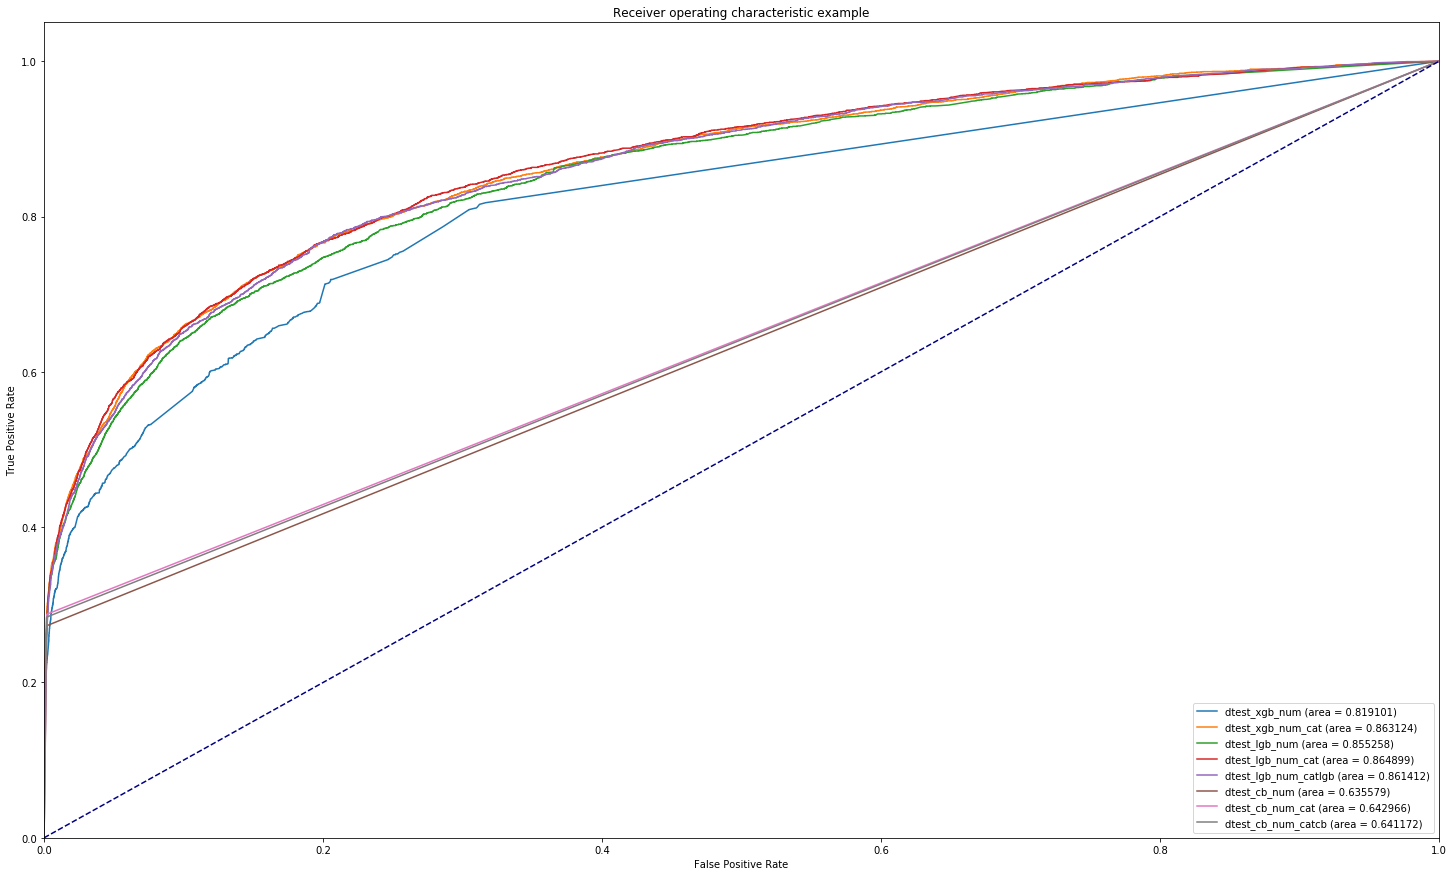

In [30]:
from sklearn.metrics import roc_curve, auc

fig = plt.figure(figsize=(25, 15))

#------------------------------------------------------------------------------
#xgb
pred = model_xgb_num.predict(dtest_xgb_num)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='dtest_xgb_num (area = %0.6f)' % roc_auc)

pred = model_xgb_num_cat.predict(dtest_xgb_num_cat)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='dtest_xgb_num_cat (area = %0.6f)' % roc_auc)
#------------------------------------------------------------------------------
#lgb
pred = model_lgb_num.predict(num_df_test)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='dtest_lgb_num (area = %0.6f)' % roc_auc)


pred = model_lgb_num_cat.predict(categorical_df_test)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='dtest_lgb_num_cat (area = %0.6f)' % roc_auc)

pred = model_lgb_num_catlgb.predict(catlgd_df_test)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='dtest_lgb_num_catlgb (area = %0.6f)' % roc_auc)
#------------------------------------------------------------------------------
#cb
pred = model_cb_num.predict(num_df_test)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='dtest_cb_num (area = %0.6f)' % roc_auc)

pred = model_cb_num_cat.predict(categorical_df_test)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='dtest_cb_num_cat (area = %0.6f)' % roc_auc)

pred = model_cb_num_catcb.predict(test_pool)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='dtest_cb_num_catcb (area = %0.6f)' % roc_auc)


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Наилучший оказался lightgbm. Он держит марку даже с недостающими категориальными данными. Работать с категориальными признаками выгоднее как с дами переменой. Средствами lightgbm при работе с категориальными признаками понизили точность. Catboost просто не сработал, хотя опять же с категориями лучше работать как с дами. lightgbm и XGBoost практически одинаковую точность выдали, но lightgbm и быстрее отрабатывает.